In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [5]:
err_sg_vs_sg = np.loadtxt("../../experiments/err/err_sg_vs_sg.txt", delimiter=' ')
err_halton_vs_sg = np.loadtxt("../../experiments/err/err_halton_vs_sg.txt", delimiter=' ')
err_sobol_vs_sg = np.loadtxt("../../experiments/err/err_sobol_vs_sg.txt", delimiter=' ')

num = np.array([5.,8.,16.,32.,64.,128.,256.,512.,1024.,2048.,4096.])

c = 0.01;
cost1 = c*num**(-1) 
cost2 = 0.1*c*num**(-2) 

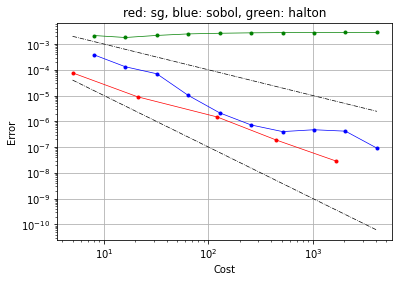

In [6]:
fig, ax = plt.subplots()

ax.loglog(err_sg_vs_sg[:,0], err_sg_vs_sg[:,1],'r.')
ax.loglog(err_sg_vs_sg[:,0], err_sg_vs_sg[:,1],'r-',lw=0.7)

ax.loglog(err_sobol_vs_sg[:,0], err_sobol_vs_sg[:,1],'b.')
ax.loglog(err_sobol_vs_sg[:,0], err_sobol_vs_sg[:,1],'b-',lw=0.7)

ax.loglog(err_halton_vs_sg[:,0], err_halton_vs_sg[:,1],'g.')
ax.loglog(err_halton_vs_sg[:,0], err_halton_vs_sg[:,1],'g-',lw=0.7)


ax.loglog(num, cost1,'k-.',lw=0.7)
ax.loglog(num, cost2,'k-.',lw=0.7)

ax.set_title("red: sg, blue: sobol, green: halton")
ax.set(xlabel="Cost", ylabel='Error')
ax.grid()

fig.savefig("../../experiments/pic/err.png",dpi = 400)
plt.show()

In [7]:
gamma = np.log(np.loadtxt("../../experiments/err/gamma.txt", delimiter=' '))
num = np.arange(1, 101, dtype=float)

c = 1

rate_d1 =  np.log(c*num**(-1))
rate_d2 =  np.log(c*num**(-2))

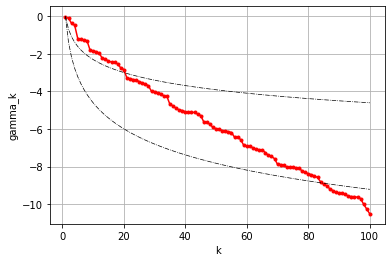

In [8]:
fig, ax = plt.subplots()

ax.plot(num, gamma,'r.')
ax.plot(num, gamma,'r-')
ax.plot(num, rate_d1,'k-.',lw=0.7)
ax.plot(num, rate_d2,'k-.',lw=0.7)

#ax.set_title("blue: Halton, red: Sobol")
ax.set(xlabel="k", ylabel='gamma_k')
ax.grid()

fig.savefig("../../experiments/pic/rate.png",dpi = 400)
plt.show()
